In [28]:
import math
import datetime as dt
import tensorflow
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

date = dt.datetime.now()

In [29]:
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = date)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591940
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659609
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800154
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933969
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913447
...,...,...,...,...,...,...
2022-01-14,173.779999,171.089996,171.339996,173.070007,80355000.0,173.070007
2022-01-18,172.539993,169.410004,171.509995,169.800003,90956700.0,169.800003
2022-01-19,171.080002,165.940002,170.000000,166.229996,94815000.0,166.229996


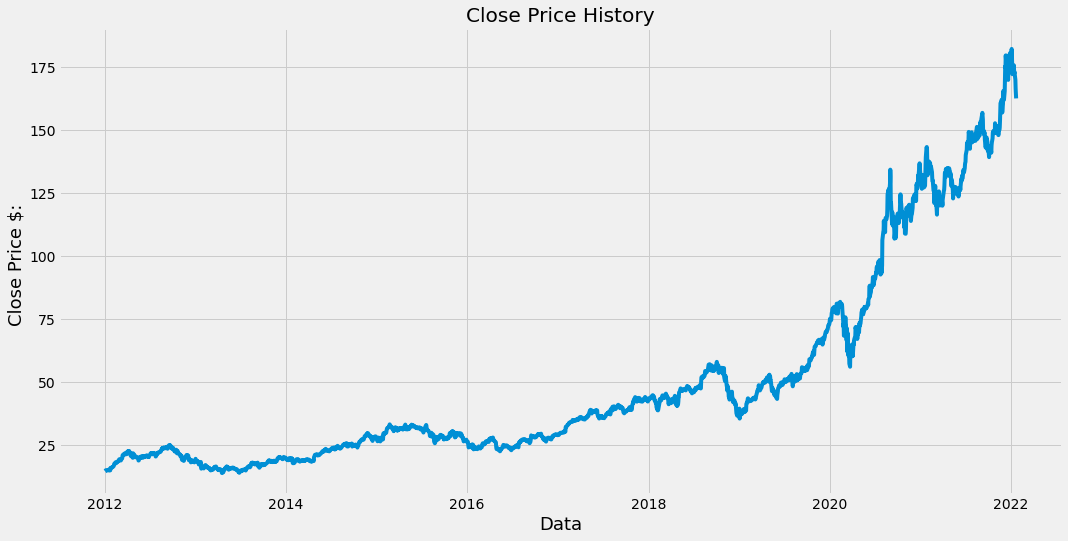

In [30]:
#Plotting The Initial Graph

plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Close Price $: ', fontsize = 18)
plt.show()

In [31]:
#Create New Dataframe With Closing Columns
data = df.filter(['Close'])
dataset = data.values

training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

2025

In [32]:
#We Scale the data to preprocess the dataset with
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.90610636],
       [0.89587207],
       [0.88337677]])

In [33]:
#Training Data
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]
[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.006

In [34]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
#Reshaping Data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1965, 60, 1)

In [36]:
model = Sequential()
model.add(LSTM(50, input_shape = (x_train.shape[1], 1), return_sequences = True))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [50]:
#Compiling Model

model.compile(optimizer = "adam", loss = "mean_squared_error")

In [38]:
#Fitting Model

model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1965/1965 [==============================] - 81s 39ms/step - loss: 1.6735e-04


In [39]:
test_data = scaled_data[training_data_len-60: , :]

x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [40]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(506, 60, 1)

In [41]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [51]:
#Getting The Root Mean Square Error

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.323004590663985

In [43]:
#Plot the Data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/tmp/ipykernel_6906/3407166783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


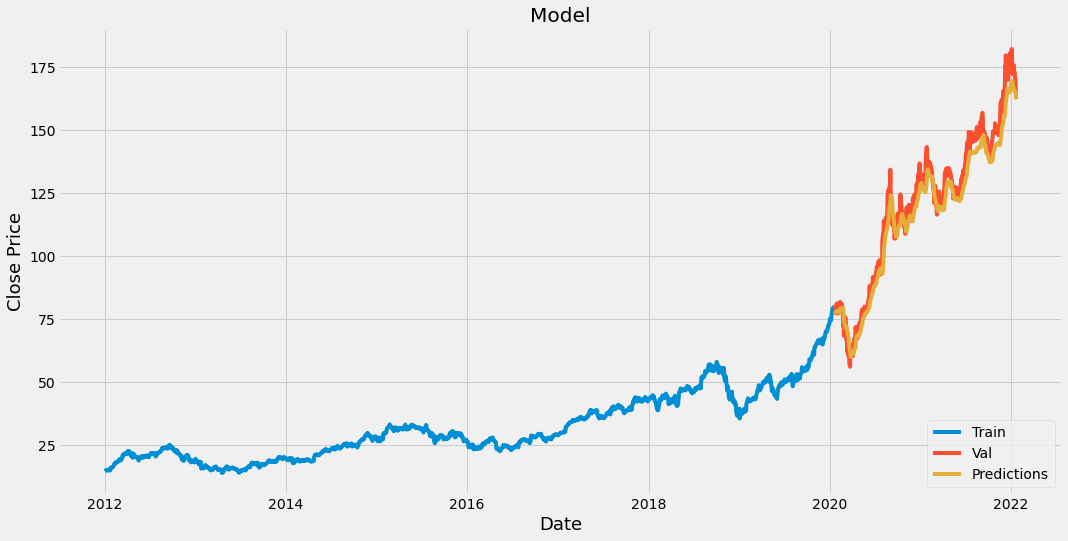

In [44]:
#Visulizer

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')

In [52]:
#Getting Value For The Latest Prediction

apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = date)
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[160.55032]]


In [53]:
app_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start = '2022-01-01', end = date)
print(app_quote2['Close'])

Date
2021-12-31    177.570007
2022-01-03    182.009995
2022-01-04    179.699997
2022-01-05    174.919998
2022-01-06    172.000000
2022-01-07    172.169998
2022-01-10    172.190002
2022-01-11    175.080002
2022-01-12    175.529999
2022-01-13    172.190002
2022-01-14    173.070007
2022-01-18    169.800003
2022-01-19    166.229996
2022-01-20    164.509995
2022-01-21    162.410004
Name: Close, dtype: float64
